# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
!nvidia-smi

Fri Oct 09 02:46:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   50C    P8    17W / 170W |   3823MiB /  6144MiB |     15%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "TCC/WDDM"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape,output_unit = 10 ,num_nerous = [512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i , num in enumerate(num_nerous):
        if i == 0:
            x = keras.layers.Dense(units = num ,
                                  activation = 'relu',
                                  name = 'hidden_layers' + str(num +1))(input_layer)
        else :
            x = keras.layers.Dense(units = num ,
                                  activation = 'relu',
                                  name = 'hidden_layers' + str(num +1))(x)
    out = keras.layers.Dense(units = output_unit,
                               activation = 'softmax',
                               name = 'output_layer')(x)
    model = keras.models.Model(inputs = [input_layer],
                              outputs = [out])
    return model

In [7]:
model1 = build_mlp(input_shape = x_train.shape[1:])
model2 = build_mlp(input_shape = x_train.shape[1:])
model3 = build_mlp(input_shape = x_train.shape[1:])
model4 = build_mlp(input_shape = x_train.shape[1:])

In [8]:
#Adam lr=0.001
optimizers = keras.optimizers.Adam(lr=0.001)
model1.compile(loss = 'categorical_crossentropy',
                            metrics = ['accuracy'],
                            optimizer = optimizers )
model1.fit(x_train,y_train,
         epochs=25,
         batch_size = 256,
         validation_data=(x_test,y_test),
         shuffle= True)

Epoch 1/25
196/196 [==============================] - 2s 11ms/step - loss: 1.9239 - accuracy: 0.3028 - val_loss: 1.7598 - val_accuracy: 0.3639
Epoch 2/25
196/196 [==============================] - 2s 10ms/step - loss: 1.7090 - accuracy: 0.3900 - val_loss: 1.6761 - val_accuracy: 0.3912
Epoch 3/25
196/196 [==============================] - 2s 10ms/step - loss: 1.6230 - accuracy: 0.4207 - val_loss: 1.6108 - val_accuracy: 0.4154
Epoch 4/25
196/196 [==============================] - 2s 10ms/step - loss: 1.5622 - accuracy: 0.4428 - val_loss: 1.5990 - val_accuracy: 0.4161
Epoch 5/25
196/196 [==============================] - 2s 10ms/step - loss: 1.5133 - accuracy: 0.4601 - val_loss: 1.5129 - val_accuracy: 0.4550
Epoch 6/25
196/196 [==============================] - 2s 10ms/step - loss: 1.4704 - accuracy: 0.4747 - val_loss: 1.4986 - val_accuracy: 0.4557
Epoch 7/25
196/196 [==============================] - 2s 10ms/step - loss: 1.4416 - accuracy: 0.4855 - val_loss: 1.5184 - val_accuracy: 0.4615

In [9]:
#Adam lr=0.01
optimizers = keras.optimizers.Adam(lr=0.01)
model2.compile(loss = 'categorical_crossentropy',
                            metrics = ['accuracy'],
                            optimizer = optimizers )
model2.fit(x_train,y_train,
         epochs=25,
         batch_size = 256,
         validation_data=(x_test,y_test),
         shuffle= True)

Epoch 1/25
196/196 [==============================] - 2s 11ms/step - loss: 3.1359 - accuracy: 0.2371 - val_loss: 1.9241 - val_accuracy: 0.2935
Epoch 2/25
196/196 [==============================] - 2s 10ms/step - loss: 1.8216 - accuracy: 0.3394 - val_loss: 1.8234 - val_accuracy: 0.3418
Epoch 3/25
196/196 [==============================] - 2s 10ms/step - loss: 1.7600 - accuracy: 0.3637 - val_loss: 1.7999 - val_accuracy: 0.3517
Epoch 4/25
196/196 [==============================] - 2s 10ms/step - loss: 1.7150 - accuracy: 0.3861 - val_loss: 1.6708 - val_accuracy: 0.3919
Epoch 5/25
196/196 [==============================] - 2s 10ms/step - loss: 1.6711 - accuracy: 0.4006 - val_loss: 1.6609 - val_accuracy: 0.3966
Epoch 6/25
196/196 [==============================] - 2s 10ms/step - loss: 1.6596 - accuracy: 0.4035 - val_loss: 1.6752 - val_accuracy: 0.3939
Epoch 7/25
196/196 [==============================] - 2s 10ms/step - loss: 1.6425 - accuracy: 0.4104 - val_loss: 1.6252 - val_accuracy: 0.4146

In [10]:
#SGD lr=0.001
optimizers = keras.optimizers.SGD(lr=0.001)
model3.compile(loss = 'categorical_crossentropy',
                            metrics = ['accuracy'],
                            optimizer = optimizers )
model3.fit(x_train,y_train,
         epochs=25,
         batch_size = 256,
         validation_data=(x_test,y_test),
         shuffle= True)

Epoch 1/25
196/196 [==============================] - 2s 9ms/step - loss: 2.2840 - accuracy: 0.1414 - val_loss: 2.2397 - val_accuracy: 0.1714
Epoch 2/25
196/196 [==============================] - 2s 9ms/step - loss: 2.2083 - accuracy: 0.2035 - val_loss: 2.1798 - val_accuracy: 0.2261
Epoch 3/25
196/196 [==============================] - 2s 9ms/step - loss: 2.1545 - accuracy: 0.2357 - val_loss: 2.1318 - val_accuracy: 0.2387
Epoch 4/25
196/196 [==============================] - 2s 9ms/step - loss: 2.1085 - accuracy: 0.2508 - val_loss: 2.0912 - val_accuracy: 0.2541
Epoch 5/25
196/196 [==============================] - 2s 9ms/step - loss: 2.0708 - accuracy: 0.2642 - val_loss: 2.0574 - val_accuracy: 0.2625
Epoch 6/25
196/196 [==============================] - 2s 9ms/step - loss: 2.0392 - accuracy: 0.2728 - val_loss: 2.0293 - val_accuracy: 0.2693
Epoch 7/25
196/196 [==============================] - 2s 9ms/step - loss: 2.0123 - accuracy: 0.2842 - val_loss: 2.0029 - val_accuracy: 0.2836
Epoch 

In [11]:
#SGD lr=0.01
optimizers = keras.optimizers.SGD(lr=0.01)
model4.compile(loss = 'categorical_crossentropy',
                            metrics = ['accuracy'],
                            optimizer = optimizers )
model4.fit(x_train,y_train,
         epochs=25,
         batch_size = 256,
         validation_data=(x_test,y_test),
         shuffle= True)

Epoch 1/25
196/196 [==============================] - 2s 11ms/step - loss: 2.0621 - accuracy: 0.2656 - val_loss: 1.9571 - val_accuracy: 0.2933
Epoch 2/25
196/196 [==============================] - 2s 9ms/step - loss: 1.8804 - accuracy: 0.3384 - val_loss: 1.8781 - val_accuracy: 0.3362
Epoch 3/25
196/196 [==============================] - 2s 9ms/step - loss: 1.8142 - accuracy: 0.3606 - val_loss: 1.8874 - val_accuracy: 0.3312
Epoch 4/25
196/196 [==============================] - 2s 9ms/step - loss: 1.7704 - accuracy: 0.3780 - val_loss: 1.8036 - val_accuracy: 0.3624
Epoch 5/25
196/196 [==============================] - 2s 9ms/step - loss: 1.7309 - accuracy: 0.3915 - val_loss: 1.7163 - val_accuracy: 0.3994
Epoch 6/25
196/196 [==============================] - 2s 9ms/step - loss: 1.7035 - accuracy: 0.4025 - val_loss: 1.7761 - val_accuracy: 0.3452
Epoch 7/25
196/196 [==============================] - 2s 9ms/step - loss: 1.6741 - accuracy: 0.4122 - val_loss: 1.7521 - val_accuracy: 0.3720
Epoch

In [13]:
"""
將實驗結果繪出
"""
def pltplot(model_name):
    model = model_name
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    val_acc = model.history.history['val_accuracy']

    plt.plot(range(len(train_loss)),train_loss,label = 'loss')
    plt.plot(range(len(val_loss)),val_loss,label = 'val_loss')
    plt.title('loss')
    plt.legend(loc='best')
    plt.show()

    plt.plot(range(len(train_acc)),train_acc,label = 'acc')
    plt.plot(range(len(val_acc)),val_acc,label = 'val_acc')
    plt.title('accuracy')
    plt.legend(loc='best')
    plt.show()

model1_Adam lr=0.001


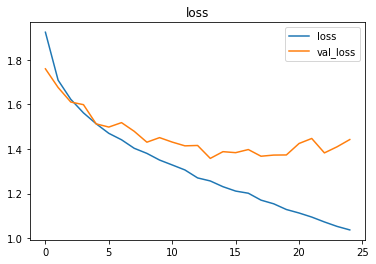

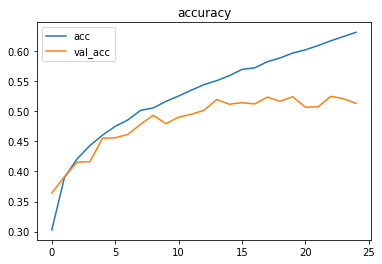

In [14]:
print('model1_Adam lr=0.001')
pltplot(model1)

model1_Adam lr=0.01


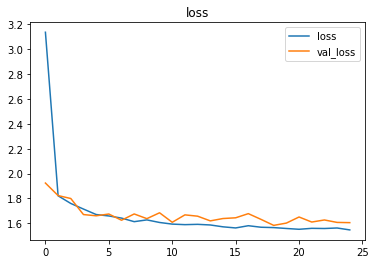

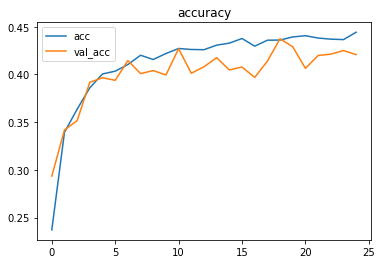

In [15]:
print('model1_Adam lr=0.01')
pltplot(model2)

model1_SGD lr=0.001


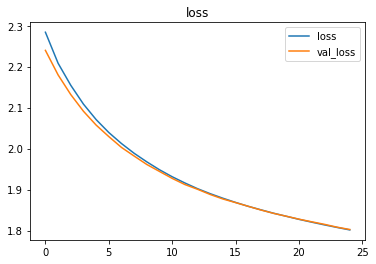

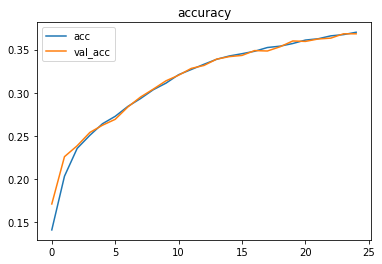

In [16]:
print('model1_SGD lr=0.001')
pltplot(model3)

model1_SGD lr=0.01


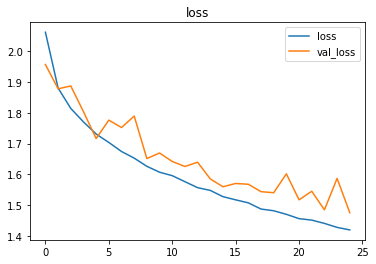

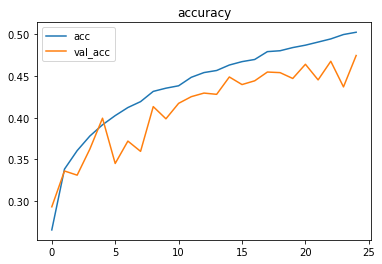

In [17]:
print('model1_SGD lr=0.01')
pltplot(model4)